In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
metrail_data = pd.read_csv('../dataset/Metrail+dataset.csv')
display(metrail_data)
metrail_data['Month'] = pd.to_datetime(metrail_data['Month'], format="%b-%y") # convert to dattime datatype to do more operations easily
metrail_data = metrail_data.set_index('Month')
display(metrail_data.info())
display(metrail_data)

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN
...,...,...
154,Nov-03,2091.0
155,Dec-03,2155.0
156,Jan-04,1848.0
157,Feb-04,1852.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1991-01-01 to 2004-03-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Travellers('000)  148 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


None

,Travellers('000)
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN
...,...
2003-11-01,2091.0
2003-12-01,2155.0
2004-01-01,1848.0


> Code review:
> 1. Use inplace=True along with set_index so assignment operation is not required
> 2. Convert to datetime when reading datset itself, so one line of code can be reduced

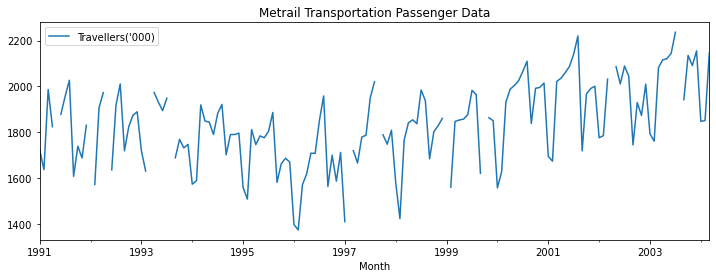

In [21]:
# Plot time series
metrail_data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Metrail Transportation Travellers Data")
plt.show(block=False)

Many missing values are present in the data

## Handling missing values

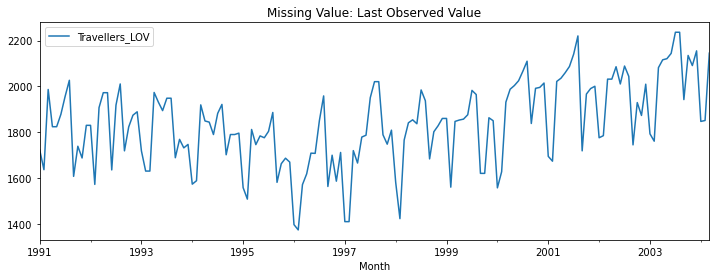

In [33]:
# Impute with last observed value
metrail_data = metrail_data.assign(Travellers_LOV = metrail_data['Travellers(\'000)'].ffill())
metrail_data[['Travellers_LOV']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Last Observed Value')
plt.show(block=False)

> To impute with Last observed value you can also use <br>
<b><i>metrail_data['Travellers(\'000)'].fillna(method='pad')

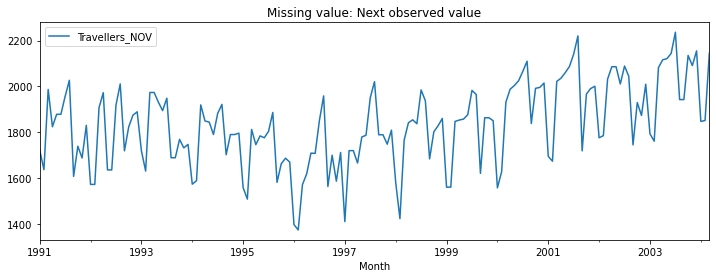

In [36]:
# Impute missing values with next value observed
metrail_data = metrail_data.assign(Travellers_NOV = metrail_data['Travellers(\'000)'].bfill())
metrail_data[['Travellers_NOV']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Next observed value')
plt.show(block=False)

> To impute with next observed value you can also use <br>
<b><i>metrail_data['Travellers('000)'].fillna(method='bfill')

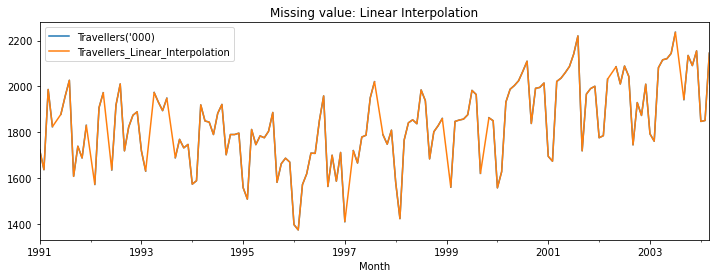

In [25]:
# Missing value imputation (Linear interpolation)
metrail_data = metrail_data.assign(Travellers_Linear_Interpolation = metrail_data['Travellers(\'000)'].interpolate(method='linear'))
metrail_data[['Travellers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Linear Interpolation')
plt.show(block=False)

Good that plot is being drawn only on imputed column

In [38]:
# Mean of Travelers_LOV
metrail_data.mean()

Travellers('000)                   1837.547297
Travellers_Linear_Interpolation    1836.566038
Travellers_LOV                     1838.685535
Travellers_NOV                     1834.446541
dtype: float64

## Handling outliers
- We are inherintly removing variance

Methods to detect outliers:
1. Extreme value analysis
2. Box plot
3. Histogram

Methods to treat outliers:

1. Replace with Mean, Median or Mode
2. Trimming (Removing records) - May not work for time series data
3. Lower and Upper Capping